# Amazon Sales Report Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"F:\Project\Python\Python_Amazon_Project\Amazon Sale Report.csv")
print(df)

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128971  128970  406-6001380-7673107  05-31-22                       Shipped   
128972  128971  402-9551604-7544318  05-31-22                       Shipped   
128973  128972  407-9547469-3152358  05-31-22                       Shipped   
128974  128973  402-6184140-0545956  05-31-22                       Shipped   
128975  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel ship-service-level 

# Information about the dataset

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

#### Datetime conversion 

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no

In [10]:
df.drop(columns=['New','PendingS'],inplace=True)
df['Amount'] = df['Amount'].fillna(0).round(2)
df["Revenue"] = df["Qty"] * df["Amount"]
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df['fulfilled-by'] = df['fulfilled-by'].fillna('Other Merchant')
df.loc[df['Status'] == 'Cancelled','Revenue'] = 0

In [11]:
print(df.head(5))

   index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...    ship-city   ship-state  ship-postal-code ship-country    B2B  \
0  ...

## Overall KPIs

In [12]:
number_of_unique_orders = df['Order ID'].nunique()
Total_orders = df['Order ID'].count()
Total_revenue = df['Revenue'].sum()
Total_Delivered_Orders = df[df['Status'] == "Shipped - Delivered to Buyer"].shape[0]
Delivered_Revenue = df[df['Status'] =="Shipped - Delivered to Buyer"]['Revenue'].sum()
Average_order_value = Delivered_Revenue/Total_Delivered_Orders

In [13]:
print(Average_order_value)

654.8755390179441


## Order Status Distribution

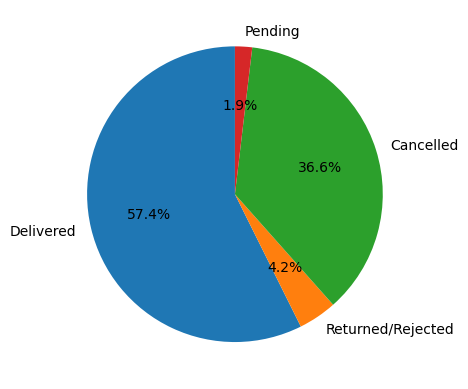

In [14]:
Total_orders_cancelled = df[df['Status'] == 'Cancelled'].shape[0]
Total_orders_returned = df[(df['Status'] == 'Shipped - Rejected by Buyer')
                           | (df['Status'] == 'Shipped - Returned to Seller')
| (df['Status'] == 'Shipped - Returning to Seller')].shape[0]
Total_orders_pending = df[(df['Status'] == 'Pending - Waiting for Pick Up') |
(df['Status'] == 'Pending')].shape[0]
sizes = [Total_Delivered_Orders, Total_orders_returned, Total_orders_cancelled, Total_orders_pending]
labels = ['Delivered', 'Returned/Rejected', 'Cancelled', 'Pending']
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=90) #pieplot for order status
plt.show()

## Monthly Trends

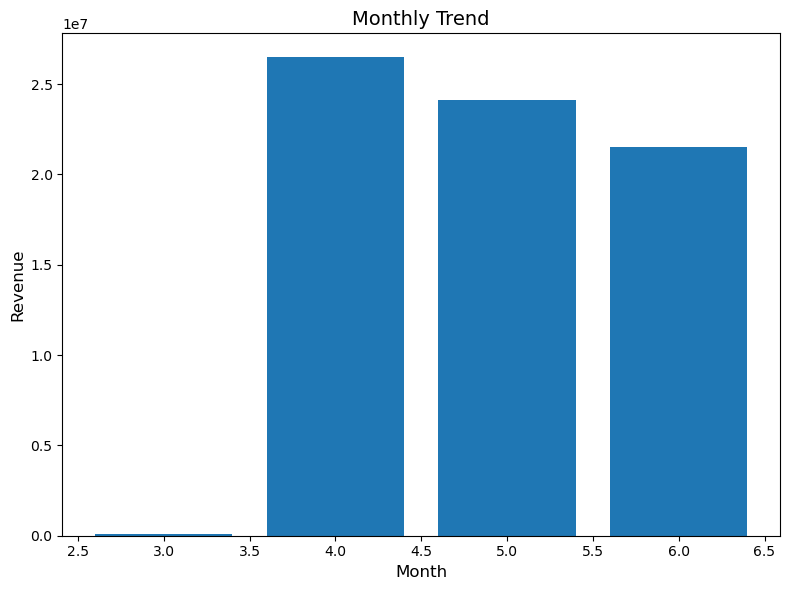

In [15]:
Monthly_trend = df.groupby(by=['Year','Month'])['Revenue'].sum().reset_index()
month = Monthly_trend[Monthly_trend['Year'] == 2022].sort_values('Month')
plt.figure(figsize=(8,6))
plt.bar(month['Month'],month['Revenue'])
plt.xlabel('Month',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.title('Monthly Trend',fontsize=14)
plt.tight_layout()
plt.show()

## Daily Trends

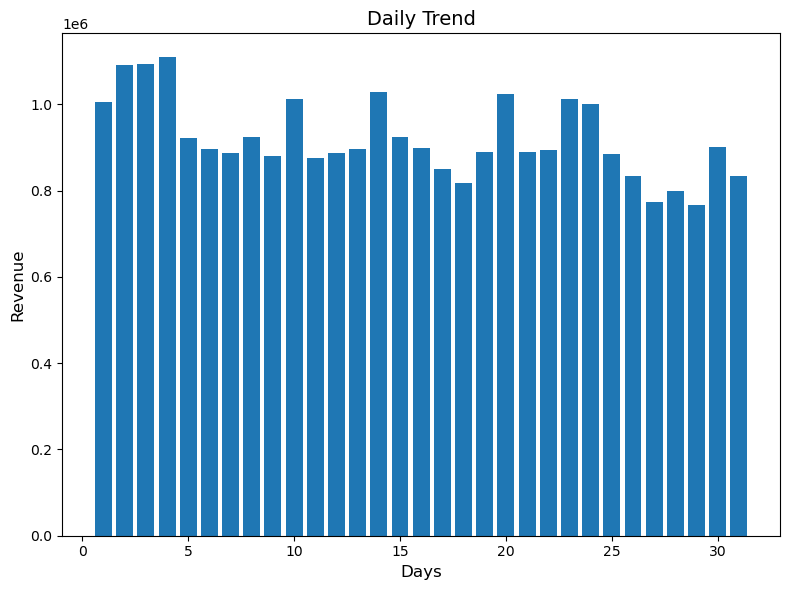

In [16]:
Daily_trends = df.groupby(by=['Month','Day'])['Revenue'].sum().reset_index()
plt.figure(figsize=(8,6))
plt.bar(Daily_trends['Day'],Daily_trends['Revenue'])
plt.xlabel('Days',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.title('Daily Trend',fontsize=14)
plt.tight_layout()
plt.show()

## Category Overview

In [18]:
top_category_by_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
print(top_category_by_revenue)
top_category_by_orders = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)
print(top_category_by_orders)
top_regions_on_revenue = df.groupby('ship-state')['Revenue'].sum().sort_values(ascending=False)
print(top_regions_on_revenue)

Category
T-shirt     35991474.0
Shirt       19636459.0
Blazzer     10287638.0
Trousers     4935936.0
Perfume       733184.0
Wallet        424061.0
Socks         138457.0
Shoes         122771.0
Watch            915.0
Name: Revenue, dtype: float64
Category
T-shirt     45292
Shirt       45044
Blazzer     13943
Trousers     9898
Perfume      1051
Wallet        863
Socks         399
Shoes         153
Watch           3
Name: Qty, dtype: int64
ship-state
MAHARASHTRA      12295895.0
KARNATAKA         9717010.0
TELANGANA         6345004.0
UTTAR PRADESH     6254849.0
TAMIL NADU        6036576.0
                    ...    
AR                    493.0
Rajsthan              443.0
PB                    399.0
APO                     0.0
Meghalaya               0.0
Name: Revenue, Length: 69, dtype: float64


## Product/Category Analysis

In [19]:
cancellation_percentage = (Total_orders_cancelled/Total_orders)*100
print(cancellation_percentage)

cancelled = df[df['Status'] == 'Cancelled'].groupby('Category').size()
cancelled = cancelled.reset_index(name='Total Counts')
cancelled['cancelled_percentage'] = (cancelled['Total Counts']/Total_orders)*100
print(cancelled)

14.215047760823719
   Category  Total Counts  cancelled_percentage
0   Blazzer          2123              1.646043
1   Perfume           145              0.112424
2     Shirt          7254              5.624302
3     Shoes            21              0.016282
4     Socks            59              0.045745
5   T-shirt          7341              5.691757
6  Trousers          1275              0.988556
7    Wallet           116              0.089939


## Cancelled Orders by category

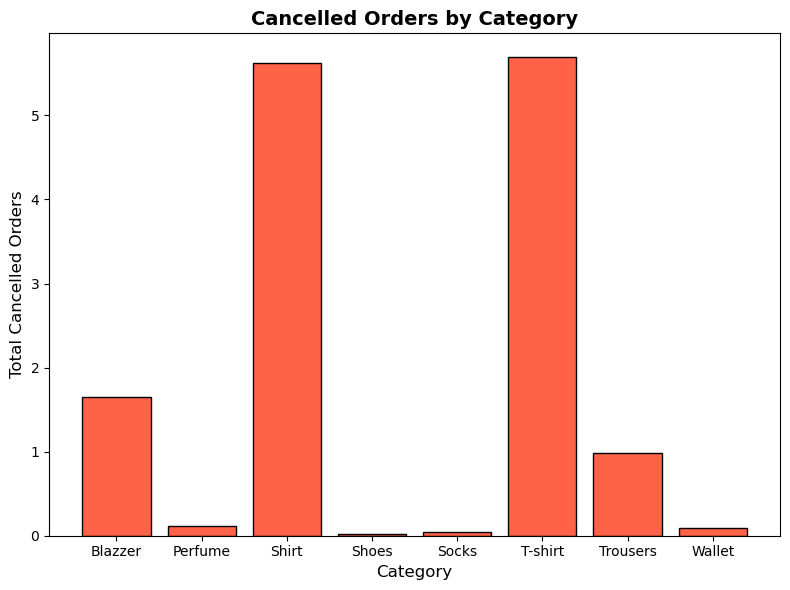

In [20]:
plt.figure(figsize=(8,6))  
plt.bar(cancelled['Category'], cancelled['cancelled_percentage'], color="tomato", edgecolor="black")
plt.title("Cancelled Orders by Category", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Cancelled Orders", fontsize=12)
plt.tight_layout()
plt.show()

# DEEP EDA

## Category Analysis

In [21]:
delivered_statuses = [
    "Shipped - Delivered to Buyer",
    "Shipped - Out for Delivery",
    "Shipped - Picked Up",
"Shipped" , "Shipping"
                        ]

return_statuses = [
    "Shipped - Returned to Seller",
    "Shipped - Rejected by Buyer",
    "Shipped - Returning to Seller",
    "Shipped - Damaged",
    "Shipped - Lost in Transit"
                        ]

cancel_statuses = ["Cancelled"]

pending_statuses = ["Pending", "Pending - Waiting for Pick Up"]

In [23]:
returned_rows = df[df['Status'].isin(return_statuses)]
returned_qty_by_cat = returned_rows.groupby('Category')['Qty'].sum().reset_index()
print(returned_qty_by_cat)
delivered_rows = df[df['Status'].isin(delivered_statuses)]
delivered_qty_by_cat = delivered_rows.groupby('Category')['Qty'].sum().reset_index()
print(delivered_qty_by_cat)
category_merged = pd.merge(delivered_qty_by_cat,returned_qty_by_cat,
                           on='Category',how='left',suffixes=('_delivered','_returned'))
category_merged['Qty_returned'] = category_merged['Qty_returned'].fillna(0)
category_merged['return_percentage'] = round(((category_merged['Qty_returned']/(
    category_merged['Qty_returned'] +  category_merged['Qty_delivered']))*100),2)
category_merged = category_merged.sort_values('return_percentage',ascending=False)
print(category_merged)

   Category  Qty
0   Blazzer  346
1   Perfume   16
2     Shirt  768
3     Shoes    1
4     Socks    6
5   T-shirt  851
6  Trousers  138
7    Wallet   12
   Category    Qty
0   Blazzer  12899
1   Perfume    991
2     Shirt  41704
3     Shoes    147
4     Socks    376
5   T-shirt  41826
6  Trousers   9151
7    Wallet    815
8     Watch      3
   Category  Qty_delivered  Qty_returned  return_percentage
0   Blazzer          12899         346.0               2.61
5   T-shirt          41826         851.0               1.99
2     Shirt          41704         768.0               1.81
1   Perfume            991          16.0               1.59
4     Socks            376           6.0               1.57
6  Trousers           9151         138.0               1.49
7    Wallet            815          12.0               1.45
3     Shoes            147           1.0               0.68
8     Watch              3           0.0               0.00


## Return % by Category

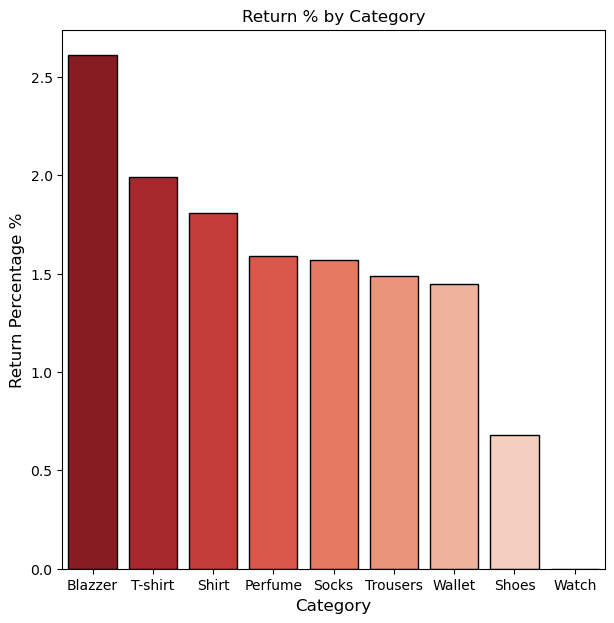

In [40]:
plt.figure(figsize=(7,7))
sns.barplot(category_merged,y='return_percentage',x='Category',palette="Reds_r",edgecolor='black',hue='Category',legend=False)
plt.title('Return % by Category',fontsize=12)
plt.ylabel('Return Percentage %',fontsize=12)
plt.xlabel('Category',fontsize=12)
plt.show()

## Fulfilment Analysis

     fulfilled-by     Revenue
0       Easy Ship  21311731.0
1  Other Merchant  50959164.0


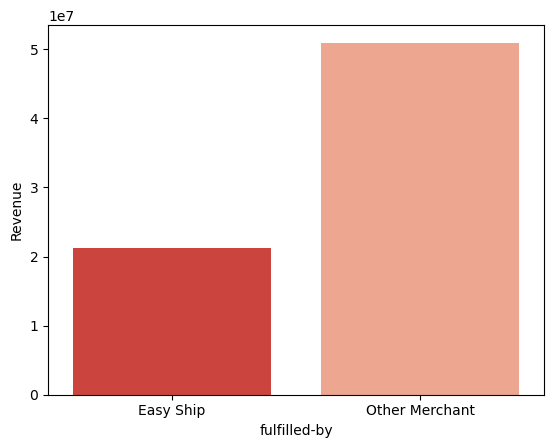

In [39]:
fulfillment = df.groupby('fulfilled-by')['Revenue'].sum().reset_index()
print(fulfillment)
sns.barplot(data=fulfillment,x='fulfilled-by',y='Revenue',palette='Reds_r',hue='fulfilled-by',legend=False)
plt.show()

In [26]:
#Total orders by fulfilment
total_orders_by_fulfilled = df.groupby('fulfilled-by')['Order ID'].count().reset_index(name='Total Orders')
print(total_orders_by_fulfilled)

#Delivered orders by fulfilment
Delivered_orders_by_fulfilment_rows = df[df['Status'].isin(delivered_statuses)]
Delivered_orders_by_fulfilment = Delivered_orders_by_fulfilment_rows.groupby('fulfilled-by')['Status'].count().reset_index(name='Delivered Orders')
print(Delivered_orders_by_fulfilment)

#Cancelled orders by fulfilment
Cancelled_orders = df[df['Status'].isin(cancel_statuses)]
Cancelled_orders_by_fulfilment = Cancelled_orders.groupby('fulfilled-by')['Status'].count().reset_index(name='Cancelled Orders')
print(Cancelled_orders_by_fulfilment)

#Returned orders by fulfilment
Returned_orders_by_fulfilment = df[df['Status'].isin(return_statuses)].groupby('fulfilled-by')['Status'].count().reset_index(name='Returned Orders')
print(Returned_orders_by_fulfilment)

#Revenue by fulfilment
Revenue_by_fulfilment = df.groupby('fulfilled-by')['Revenue'].sum().reset_index(name='Revenue')
print(Revenue_by_fulfilment)


     fulfilled-by  Total Orders
0       Easy Ship         39263
1  Other Merchant         89713
     fulfilled-by  Delivered Orders
0       Easy Ship             29764
1  Other Merchant             77823
     fulfilled-by  Cancelled Orders
0       Easy Ship              6859
1  Other Merchant             11475
  fulfilled-by  Returned Orders
0    Easy Ship             2116
     fulfilled-by     Revenue
0       Easy Ship  21311731.0
1  Other Merchant  50959164.0


In [27]:
fulfilment_summary = total_orders_by_fulfilled \
    .merge(Delivered_orders_by_fulfilment,on='fulfilled-by',how='left')\
    .merge(Cancelled_orders_by_fulfilment,on='fulfilled-by',how='left')\
    .merge(Returned_orders_by_fulfilment,on='fulfilled-by',how='left')\
    .merge(Revenue_by_fulfilment,on='fulfilled-by',how='left')

fulfilment_summary = fulfilment_summary.fillna(0)
print(fulfilment_summary)

     fulfilled-by  Total Orders  Delivered Orders  Cancelled Orders  \
0       Easy Ship         39263             29764              6859   
1  Other Merchant         89713             77823             11475   

   Returned Orders     Revenue  
0           2116.0  21311731.0  
1              0.0  50959164.0  


In [36]:
fulfilment_summary["Delivery %"] = (fulfilment_summary["Delivered Orders"] / fulfilment_summary["Total Orders"]) * 100
fulfilment_summary["Cancel %"] = (fulfilment_summary["Cancelled Orders"] / fulfilment_summary["Total Orders"]) * 100
fulfilment_summary["Return %"] = (fulfilment_summary["Returned Orders"] / (fulfilment_summary["Delivered Orders"] + fulfilment_summary["Returned Orders"])) * 100

fulfilment_summary = fulfilment_summary.sort_values(by='Revenue',ascending=False)
fulfillment = pd.set_option('display.max_columns', None)
print(fulfilment_summary)
melted_fulfilment_summary = fulfilment_summary.melt(
            id_vars="fulfilled-by",
            value_vars=["Delivery %","Cancel %","Return %"],
            var_name="Status",
            value_name="Percentage"
)

     fulfilled-by  Total Orders  Delivered Orders  Cancelled Orders  \
1  Other Merchant         89713             77823             11475   
0       Easy Ship         39263             29764              6859   

   Returned Orders     Revenue  Delivery %   Cancel %  Return %  
1              0.0  50959164.0   86.746625  12.790788   0.00000  
0           2116.0  21311731.0   75.806739  17.469373   6.63739  


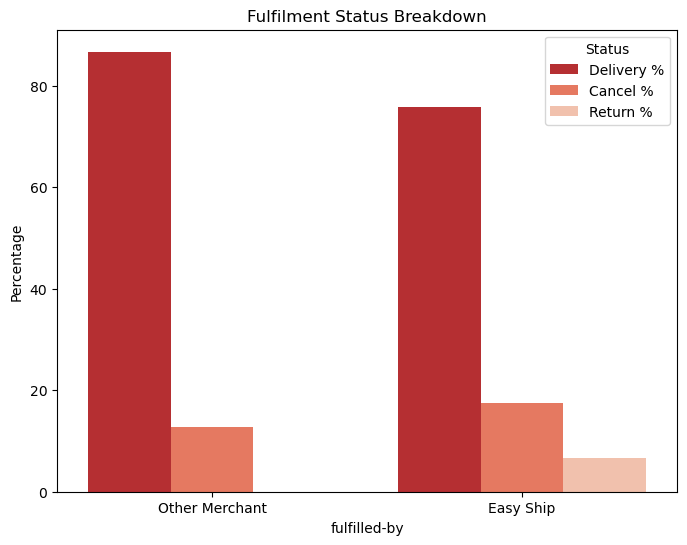

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(data=melted_fulfilment_summary, x="fulfilled-by", y="Percentage", hue="Status",palette="Reds_r")
plt.title("Fulfilment Status Breakdown")
plt.show()

## Geographic Analysis

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'Revenue', 'Month', 'Day',
       'Year'],
      dtype='object')
       ship-state     Revenue
28    MAHARASHTRA  12295895.0
23      KARNATAKA   9717010.0
57      TELANGANA   6345004.0
59  UTTAR PRADESH   6254849.0
56     TAMIL NADU   6036576.0
..            ...         ...
3              AR       493.0
53       Rajsthan       443.0
42             PB       399.0
2             APO         0.0
33      Meghalaya         0.0

[69 rows x 2 columns]


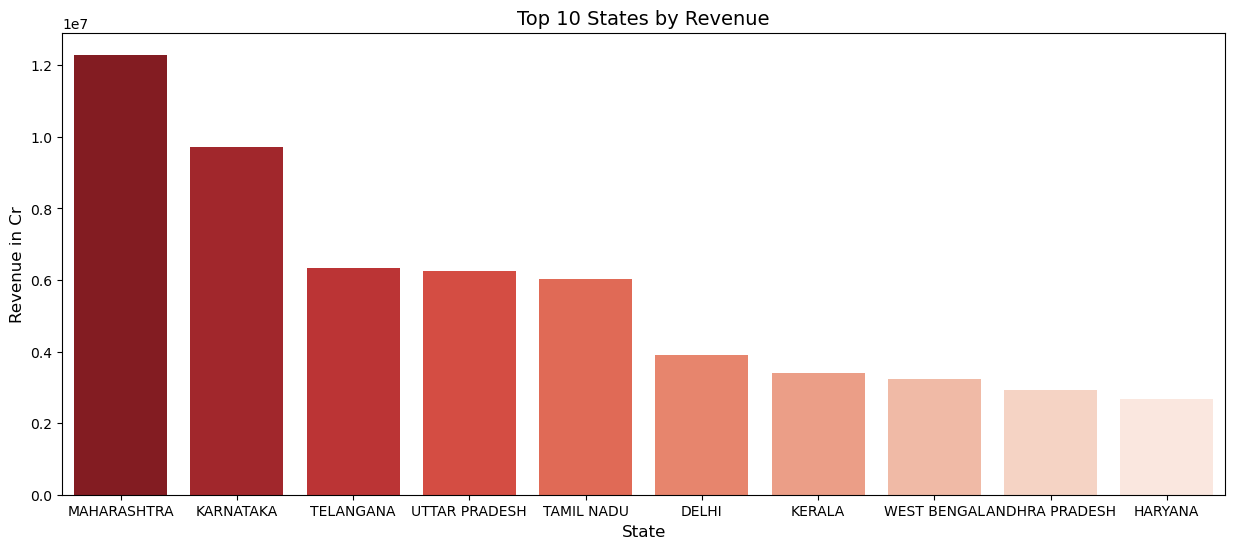

In [38]:
print(df.columns)
Revenue_by_state = df.groupby('ship-state')['Revenue'].sum().reset_index(name='Revenue')
Revenue_by_state.sort_values(by='Revenue',ascending=False,inplace=True)
print(Revenue_by_state)
plt.figure(figsize=(15,6))
sns.barplot(
    data=Revenue_by_state.head(10),
    x='ship-state',
    y='Revenue',
    hue='ship-state',        # add hue
    palette="Reds_r",
    legend=False             # hide duplicate legend
)
plt.title("Top 10 States by Revenue", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Revenue in Cr", fontsize=12)
plt.show()